# Case Study on Measures of Central Tendency and Dispersion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
std = pd.read_csv('StudentsPerformance.csv')
std

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


## 1. Find out how many males and females participated in the test.

In [25]:
gen=std['gender'].value_counts()

In [26]:
gen

female    518
male      482
Name: gender, dtype: int64

In [28]:
print('The no. of Female participants in the test are :',gen.female)
print('The no of Male participants in the test are :',gen.male)

The no. of Female participants in the test are : 518
The no of Male participants in the test are : 482


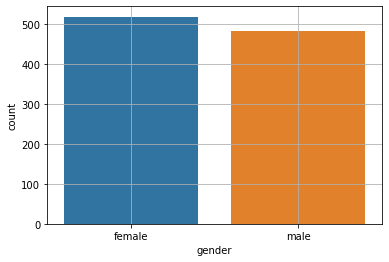

In [29]:
sns.countplot(std['gender'])
plt.grid()

## 2. What do you think about the students' parental level of education?

In [8]:
pat=std['parental level of education'].mode()
pat

0    some college
dtype: object

In [9]:
print('Most the students Parental level of Education is',"'" , pat[0], "'")

Most the students Parental level of Education is ' some college '


In [10]:
ptCount=std['parental level of education'].value_counts()
ptCount

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

- Most of the students Parental level of Education is "Some College"
- Less than 1/4th of the student participant's parents have either a Bachelor's degree or Master's Degree (Proper Higher studies).

## 3. Who scores the most on average for math, reading and writing based on¶
● Gender ● Test preparation course

1. Gender

In [54]:
gen=std.groupby('gender').mean()
gen

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [60]:
GenMath = gen.nlargest(1,['math score'])
GenReading = gen.nlargest(1,['reading score'])
GenWriting = gen.nlargest(1,['writing score'])

print('Most average scored for Maths based on', GenMath['math score'])
print('Most average scored for reading based on', GenReading['reading score'])
print('Most average scored for writing based on', GenWriting['writing score'])

Most average scored for Maths based on gender
male    68.821577
Name: math score, dtype: float64
Most average scored for reading based on gender
female    72.590734
Name: reading score, dtype: float64
Most average scored for writing based on gender
female    72.467181
Name: writing score, dtype: float64


2.Test preparation course

In [61]:
tp=std.groupby('test preparation course').mean()
tp

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [69]:
TpMath = tp.nlargest(1,['math score'])
TpReading = tp.nlargest(1,['reading score'])
TpWriting = tp.nlargest(1,['writing score'])
print('Most average scored for Maths based on', TpMath['math score'])
print('Most average scored for reading based on', TpReading['reading score'])
print('Most average scored for writing based on', TpWriting['writing score'])


Most average scored for Maths based on test preparation course
completed    69.96648
Name: math score, dtype: float64
Most average scored for reading based on test preparation course
completed    74.175978
Name: reading score, dtype: float64
Most average scored for writing based on test preparation course
completed    74.684358
Name: writing score, dtype: float64


3. Both gender and Test preparation course

In [63]:
GT=std.groupby(['gender','test preparation course']).mean()
GT

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

In [65]:
GTMath = GT.nlargest(1,['math score'])
GTReading = GT.nlargest(1,['reading score'])
GTWriting = GT.nlargest(1,['writing score'])

print('Most average scored for Maths based on', GTMath['math score'])
print('Most average scored for reading based on', GTReading['reading score'])
print('Most average scored for writing based on', GTWriting['writing score'])

Most average scored for Maths based on gender  test preparation course
male    completed                  72.988506
Name: math score, dtype: float64
Most average scored for reading based on gender  test preparation course
female  completed                  77.375
Name: reading score, dtype: float64
Most average scored for writing based on gender  test preparation course
female  completed                  78.793478
Name: writing score, dtype: float64


## 4. What do you think about the scoring variation for math, reading and writing based on
● Gender ● Test preparation course

1. Gender

In [15]:
std.groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


- The maths score for female has more scoring variation than the rest
- Also female students scoring variation is slightly higher that of Male students

2.Test preparation course

In [16]:
std.groupby('test preparation course').std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


- The students who have not completed the test preparation course has more scoring variation for all three(Math, reading,writing) 
- Also the differences between the scoring variations of the students completed and not taken test preparation course are slightly higher for writing score than the other two. 


3. Both gender and Test preparation course

In [17]:
std.groupby(['gender','test preparation course']).std()

math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284

- More scoring variation for Math, Reading, Writing is evident for female students who have not taken the test preparation course comparing to the female students who have completed test preparation course

- There is only slight scoring variation for Math, Reading, Writing  between male students who have compelted and not taken the test preparation course

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [18]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
math =std['math score'].count()

In [20]:
print('The Total no.of students comes under top 25% is : ' ,(math*25)/100)

The Total no.of students comes under top 25% is :  250.0


In [21]:
topstudents=std.sort_values(by='math score',ascending=False)
topstudents

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [22]:
topstudents.iloc[0:250,0:6]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
999,male,group E,bachelor's degree,standard,completed,100
996,male,group A,some college,standard,completed,100
515,female,group E,some college,standard,none,100
517,female,group E,associate's degree,standard,none,100
516,female,group E,bachelor's degree,standard,none,100
...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77
855,male,group E,associate's degree,free/reduced,completed,77
854,male,group D,some high school,standard,completed,77
853,male,group D,associate's degree,free/reduced,none,77


Above are the list of top 25% of students based on their maths score who are eligiable for bonus points